In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 16]

In [5]:
TEST_FILES = [
    "/Users/chris/Dev/cod_records/aws/extracted/31829_B016711/31829_B016711-00000.jpg",
    "/Users/chris/Dev/cod_records/george circumstance of death.jpg"
]

Implement this: https://stackoverflow.com/questions/46274961/removing-horizontal-lines-in-image-opencv-python-matplotlib

- Obtain binary image. Load the image, convert to grayscale, then Otsu's threshold to obtain a binary black/white image.
- Detect and remove horizontal lines. To detect horizontal lines, we create a special horizontal kernel and morph open to detect horizontal contours. From here we find contours on the mask and "fill in" the detected horizontal contours with white to effectively remove the lines
- Repair image. At this point the image may have gaps if the horizontal lines intersected through characters. To repair the text, we create a vertical kernel and morph close to reverse the damage


Also using this:
https://stackoverflow.com/a/60815631/13836535

In [ ]:
def get_cmyk(bgr):
    # Make float and divide by 255 to give BGRdash
    bgrdash = bgr.astype(np.float)/255.

    # Calculate K as (1 - whatever is biggest out of Rdash, Gdash, Bdash)
    K = 1 - np.max(bgrdash, axis=2)

    # Calculate C
    C = (1-bgrdash[...,2] - K)/(1-K)

    # Calculate M
    M = (1-bgrdash[...,1] - K)/(1-K)

    # Calculate Y
    Y = (1-bgrdash[...,0] - K)/(1-K)

    # Combine 4 channels into single image and re-scale back up to uint8
    return (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

In [65]:
def get_K(bgr):
    # Make float and divide by 255 to give BGRdash
    bgrdash = bgr.astype(float)/255.

    # Calculate K as (1 - whatever is biggest out of Rdash, Gdash, Bdash)
    K = 1 - np.max(bgrdash, axis=2)
    gray = (K * 255).astype(np.uint8)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    plt.imshow(thresh, cmap='gray')

    return gray


array([[247, 247, 248, ..., 250, 250, 250],
       [248, 249, 250, ..., 250, 250, 250],
       [251, 251, 252, ..., 250, 251, 251],
       ...,
       [254, 254, 254, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

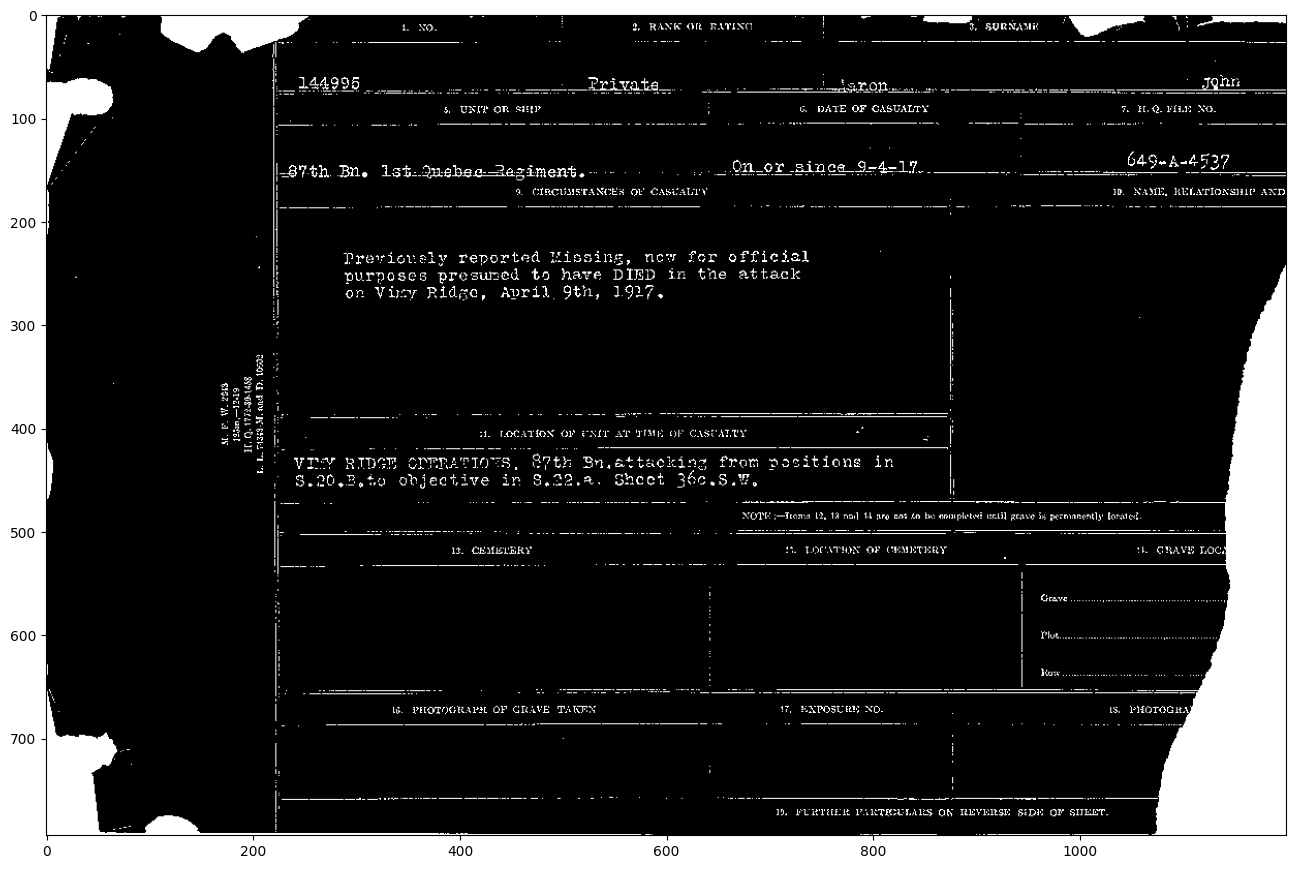

In [66]:
img = cv2.imread(TEST_FILES[0])
get_K(img)

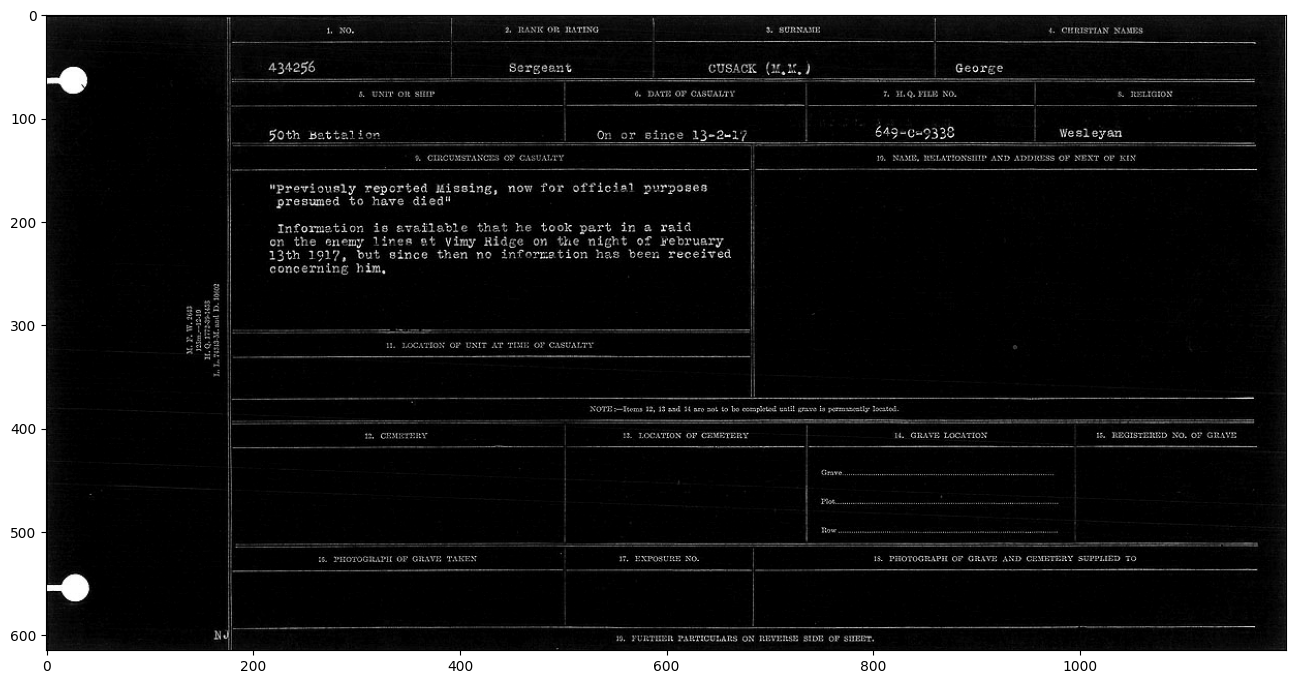

In [29]:
get_K(TEST_FILES[1])

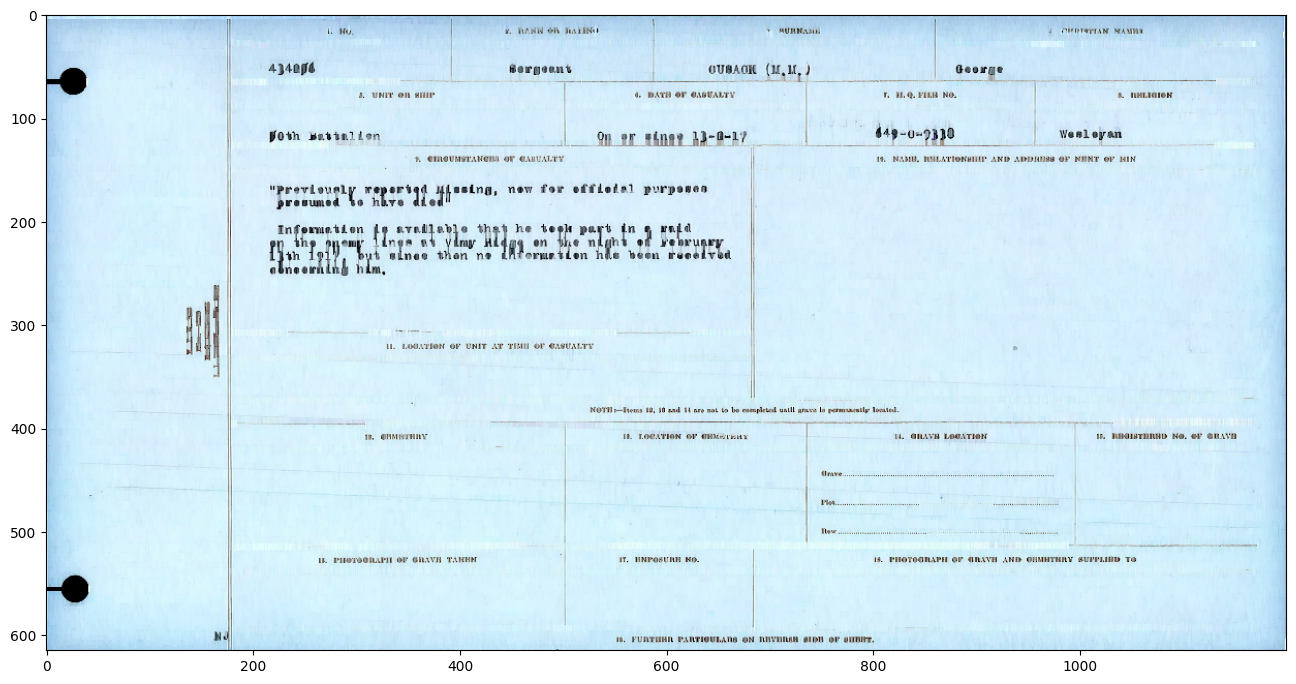

In [68]:
# To detect horizontal lines, we create a special horizontal kernel and morph open to detect horizontal contours.
# From here we find contours on the mask and "fill in" the detected horizontal contours with white to effectively remove the lines

image = cv2.imread(TEST_FILES[1])
thresh = get_K(image)

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 1)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.imshow(result)

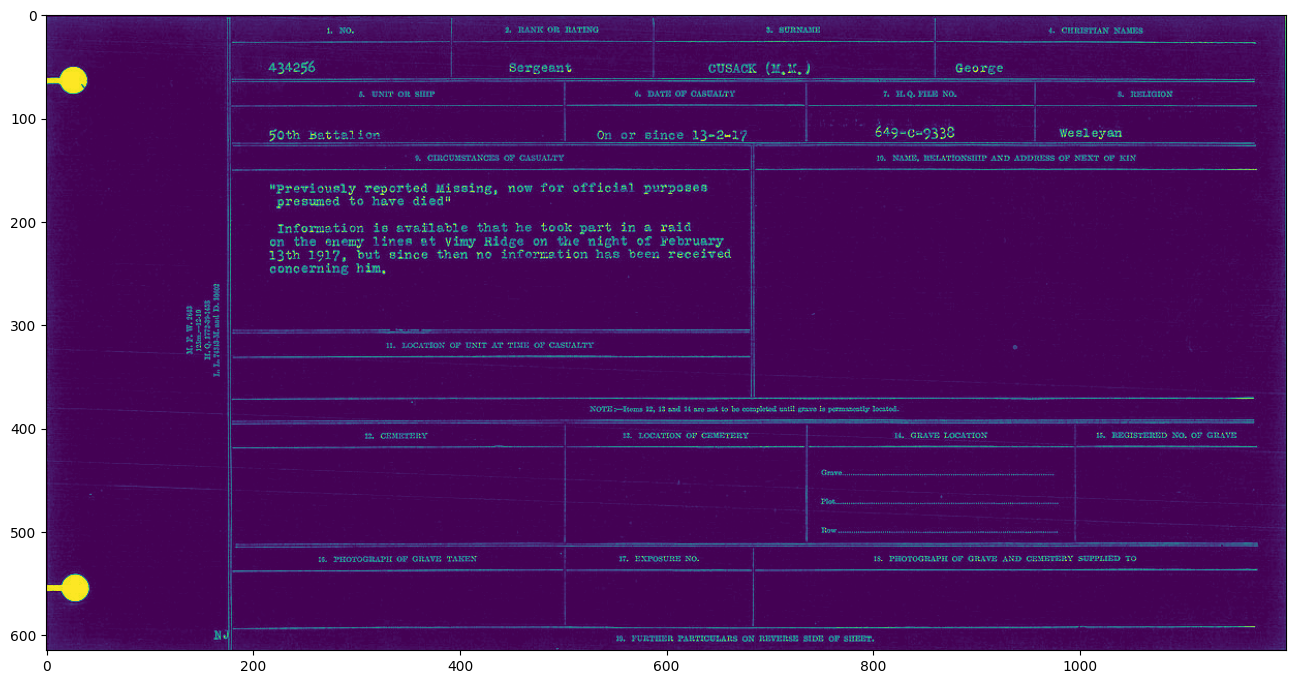

In [55]:
image = cv2.imread(TEST_FILES[1])
thresh = get_K(image)

plt.imshow(thresh)